In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
algerian_forest_fires = fetch_ucirepo(id=547)

# data (as pandas dataframes)
X = algerian_forest_fires.data.features
y = algerian_forest_fires.data.targets

# metadata
print(algerian_forest_fires.metadata)

# variable information
print(algerian_forest_fires.variables)


{'uci_id': 547, 'name': 'Algerian Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/547/data.csv', 'abstract': 'The dataset includes 244 instances that regroup a data of two regions of Algeria.', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 244, 'num_features': 14, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Classes  '], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Mar 19 2024', 'dataset_doi': '10.24432/C5KW4N', 'creators': [' Faroudja Abid'], 'intro_paper': {'ID': 325, 'type': 'NATIVE', 'title': ' Predicting Forest Fire in Algeria Using Data Mining Techniques: Case Study of the Decision Tree Algorithm', 'authors': 'Faroudja Abid, N.Izeboudjen', 'venue': 'Ezziyyani M. (eds) Advanced Intelligent Systems

In [4]:
X.columns = X.columns.str.replace(' ','')
y.columns = y.columns.str.replace(' ','')

In [5]:
X.columns

Index(['region', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

In [6]:
y.columns

Index(['Classes'], dtype='object')

In [7]:
X.isnull().sum()

region         0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
dtype: int64

In [8]:
y.isnull().sum()

Classes    1
dtype: int64

| Variable Name                | Role      | Type          | Description                                                                 | Units   | Missing Values | Range/Values          |
|------------------------------|-----------|---------------|-----------------------------------------------------------------------------|---------|----------------|-----------------------|
| region                      | Feature   | Categorical   | Bejaia or Sidi-Bel Abbes                                                   |         | no             |                       |
| day                         | Feature   | Integer       | Day of the month                                                           |         | no             |                       |
| month                       | Feature   | Integer       | Month of the year ('June' to 'September')                                  |         | no             |                       |
| year                        | Feature   | Integer       | Year (2012)                                                                |         | no             |                       |
| Date                        | Feature   | Categorical   | Day, month ('June' to 'September'), year (2012)                            |         | no             | DD/MM/YYYY            |
| Temperature (Temp)          | Feature   | Integer       | Temperature at noon (maximum temperature)                                  | C       | no             | 22 to 42             |
| RH                          | Feature   | Integer       | Relative Humidity                                                          | %       | no             | 21 to 90             |
| Ws                          | Feature   | Integer       | Wind speed                                                                 | km/h    | no             | 6 to 29              |
| Rain                        | Feature   | Continuous    | Total rainfall for the day                                                 | mm      | no             | 0 to 16.8            |
| Fine Fuel Moisture Code     | Feature   | Continuous    | FFMC index from the FWI system                                             |         | no             | 28.6 to 92.5         |
| Duff Moisture Code (DMC)    | Feature   | Continuous    | DMC index from the FWI system                                              |         | no             | 1.1 to 65.9          |
| Drought Code (DC)           | Feature   | Continuous    | DC index from the FWI system                                               |         | no             | 7 to 220.4           |
| Initial Spread Index (ISI)  | Feature   | Continuous    | ISI index from the FWI system                                              |         | no             | 0 to 18.5            |
| Buildup Index (BUI)         | Feature   | Continuous    | BUI index from the FWI system                                              |         | no             | 1.1 to 68            |
| Fire Weather Index (FWI)    | Feature   | Continuous    | FWI Index                                                                  |         | no             | 0 to 31.1            |
| Classes                     | Target    | Categorical   | Two classes: "Fire" and "not Fire"                                         |         | no             | Categorical          |

In [9]:
X.head()

,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,Bejaia,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,Bejaia,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,Bejaia,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,Bejaia,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0
4,Bejaia,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       244 non-null    object 
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    int64  
 5   RH           244 non-null    int64  
 6   Ws           244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    object 
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


In [11]:
print(X['DC'].dtypes)

object


In [12]:
for index,value in X['DC'].items():
    print(f"Index: {index}, Value: {value}, Type: {type(value)}")

Index: 0, Value: 7.6, Type: <class 'str'>
Index: 1, Value: 7.6, Type: <class 'str'>
Index: 2, Value: 7.1, Type: <class 'str'>
Index: 3, Value: 6.9, Type: <class 'str'>
Index: 4, Value: 14.2, Type: <class 'str'>
Index: 5, Value: 22.2, Type: <class 'str'>
Index: 6, Value: 30.5, Type: <class 'str'>
Index: 7, Value: 38.3, Type: <class 'str'>
Index: 8, Value: 38.8, Type: <class 'str'>
Index: 9, Value: 46.3, Type: <class 'str'>
Index: 10, Value: 54.3, Type: <class 'str'>
Index: 11, Value: 61.4, Type: <class 'str'>
Index: 12, Value: 17, Type: <class 'str'>
Index: 13, Value: 7.8, Type: <class 'str'>
Index: 14, Value: 7.4, Type: <class 'str'>
Index: 15, Value: 7.6, Type: <class 'str'>
Index: 16, Value: 7.8, Type: <class 'str'>
Index: 17, Value: 8, Type: <class 'str'>
Index: 18, Value: 16, Type: <class 'str'>
Index: 19, Value: 27.1, Type: <class 'str'>
Index: 20, Value: 31.6, Type: <class 'str'>
Index: 21, Value: 39.5, Type: <class 'str'>
Index: 22, Value: 47.7, Type: <class 'str'>
Index: 23, Va

In [13]:
import pandas as pd

def is_numeric(value):
    try:
        float(value)
        return True
    except (TypeError, ValueError):
        return False

seen_indices = set()  # To track indices we've encountered

for index, value in X['DC'].items():
    if not is_numeric(value):
        print(f"Index: {index}, Value: {value}, is_numeric: False")

    if index in seen_indices:
        print(f"Index {index} is repeated!")
    else:
        seen_indices.add(index)

Index: 165, Value: 14.6 9, is_numeric: False


In [14]:
X.loc[165]

region         Sidi-Bel Abbes
day                        14
month                       7
year                     2012
Temperature                37
RH                         37
Ws                         18
Rain                      0.2
FFMC                     88.9
DMC                      12.9
DC                     14.6 9
ISI                      12.5
BUI                      10.4
FWI                   fire   
Name: 165, dtype: object

In [15]:
# Correct the values for row 165
X.loc[165, 'DC'] = 14.6  # First value from the combined string
X.loc[165, 'ISI'] = 9.0   # Shifted ISI value
X.loc[165, 'BUI'] = 12.5  # Shifted BUI value
X.loc[165, 'FWI'] = 10.4  # Shifted FWI value

In [16]:
# # Correct the value for y.loc[165]
# y.loc[165] = 'fire'

In [17]:
y.loc[165]

Classes    NaN
Name: 165, dtype: object

In [18]:
y = y.copy()
y.loc[165] = 'fire'

In [19]:
y.isnull().sum()

Classes    0
dtype: int64

In [20]:
X = X.copy()
X['DC'] = pd.to_numeric(X['DC'], errors='coerce')
X['FWI'] = pd.to_numeric(X['FWI'], errors='coerce')

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       244 non-null    object 
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    int64  
 5   RH           244 non-null    int64  
 6   Ws           244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    float64
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    float64
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [22]:
X.columns

Index(['region', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

In [23]:
numerical_features = [ 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [24]:
X['year'].unique()

array([2012])

In [25]:
X = X.drop('year', axis=1)

In [26]:
X['month'].unique()

array([6, 7, 8, 9])

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       244 non-null    object 
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
dtypes: float64(7), int64(5), object(1)
memory usage: 24.9+ KB


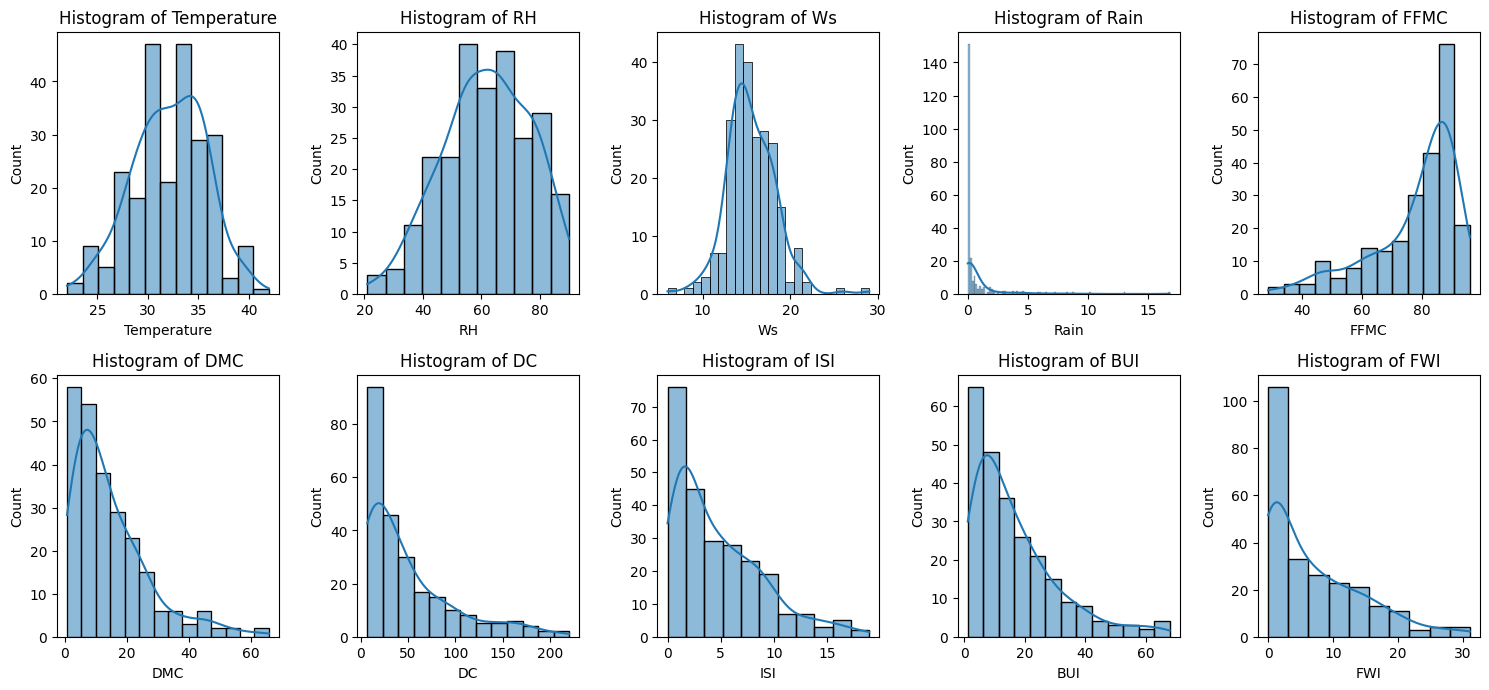

In [28]:
# Histograms for each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 5, i + 1)
    sns.histplot(X[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

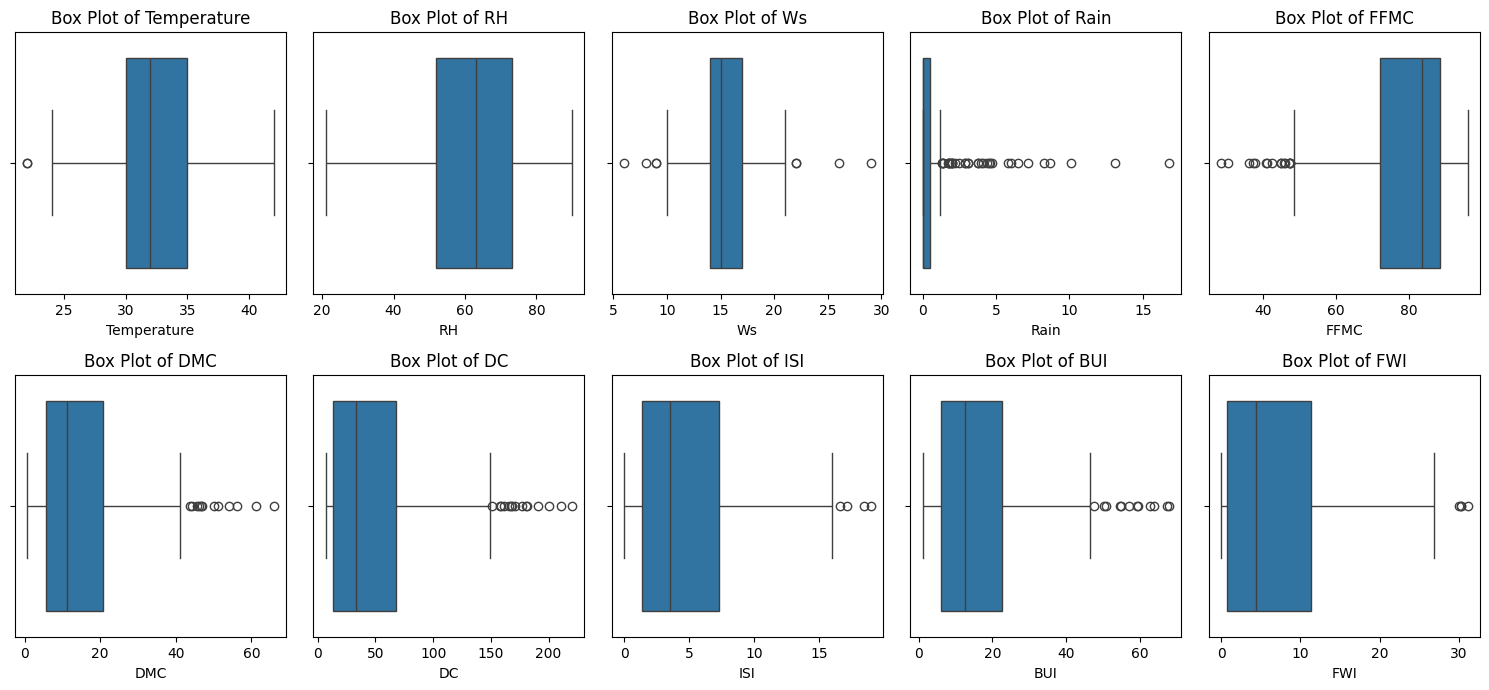

In [29]:
# Box plots for each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(x=X[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

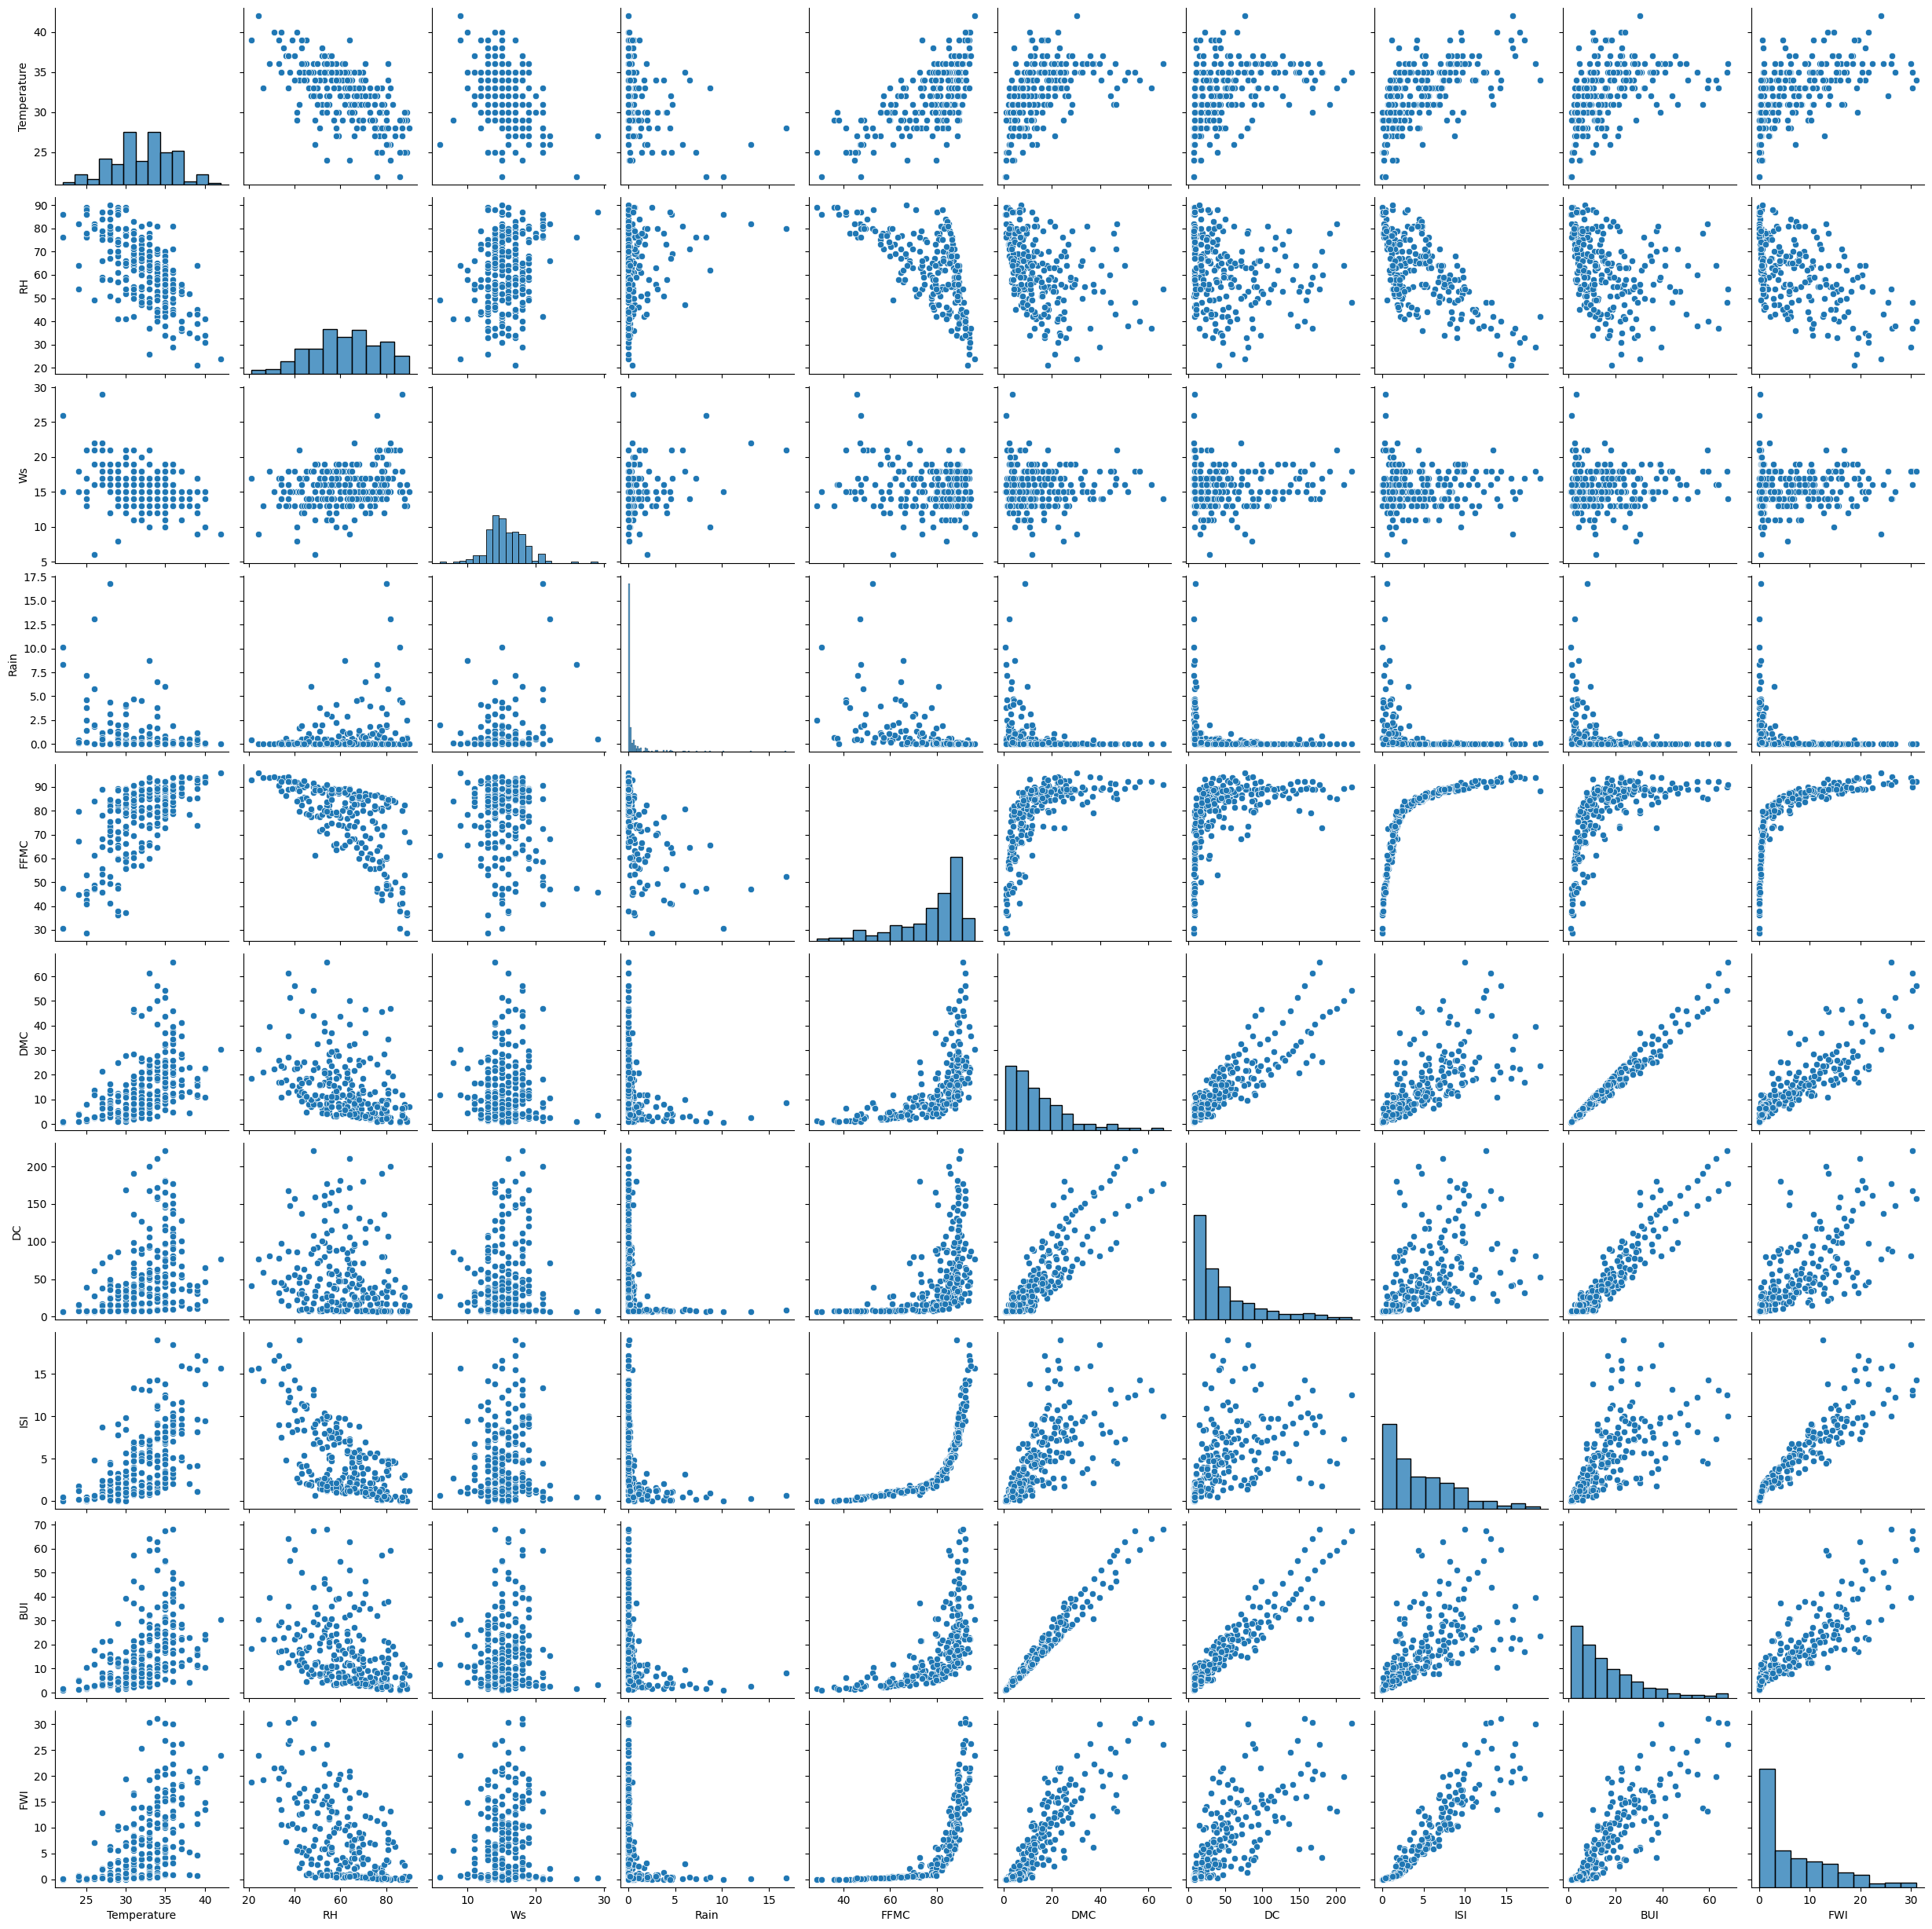

In [30]:
# Pair plot for numerical features
sns.pairplot(X[numerical_features])
plt.show()

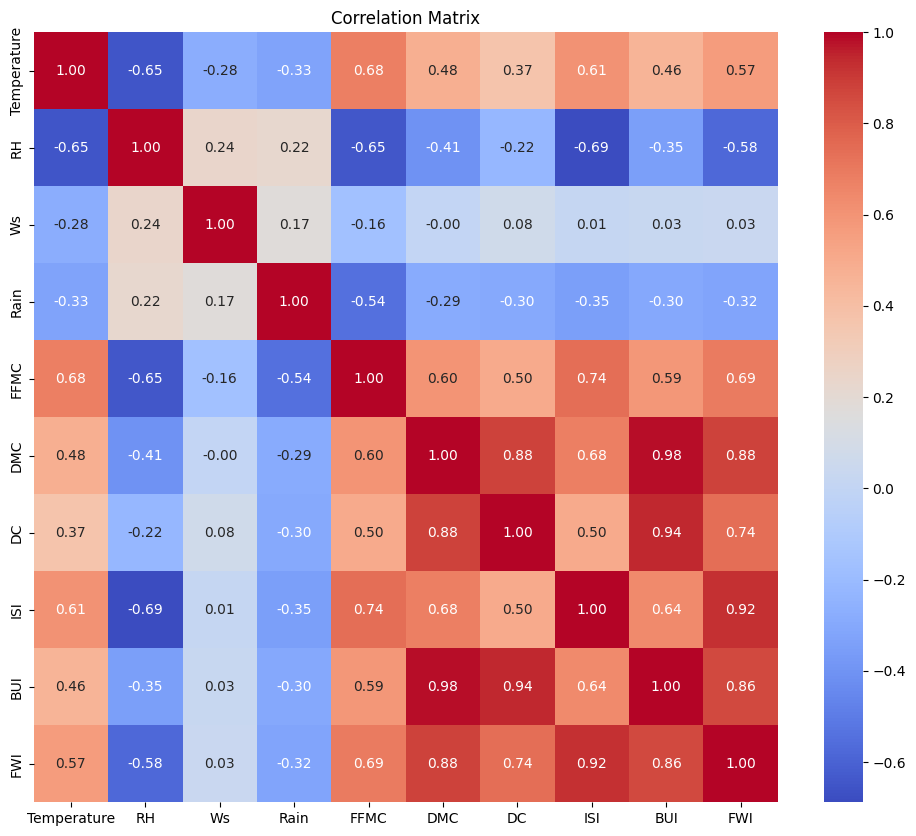

In [31]:
# Correlation matrix
correlation_matrix = X[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Region value counts
print(X['region'].value_counts())

region
Bejaia            122
Sidi-Bel Abbes    122
Name: count, dtype: int64


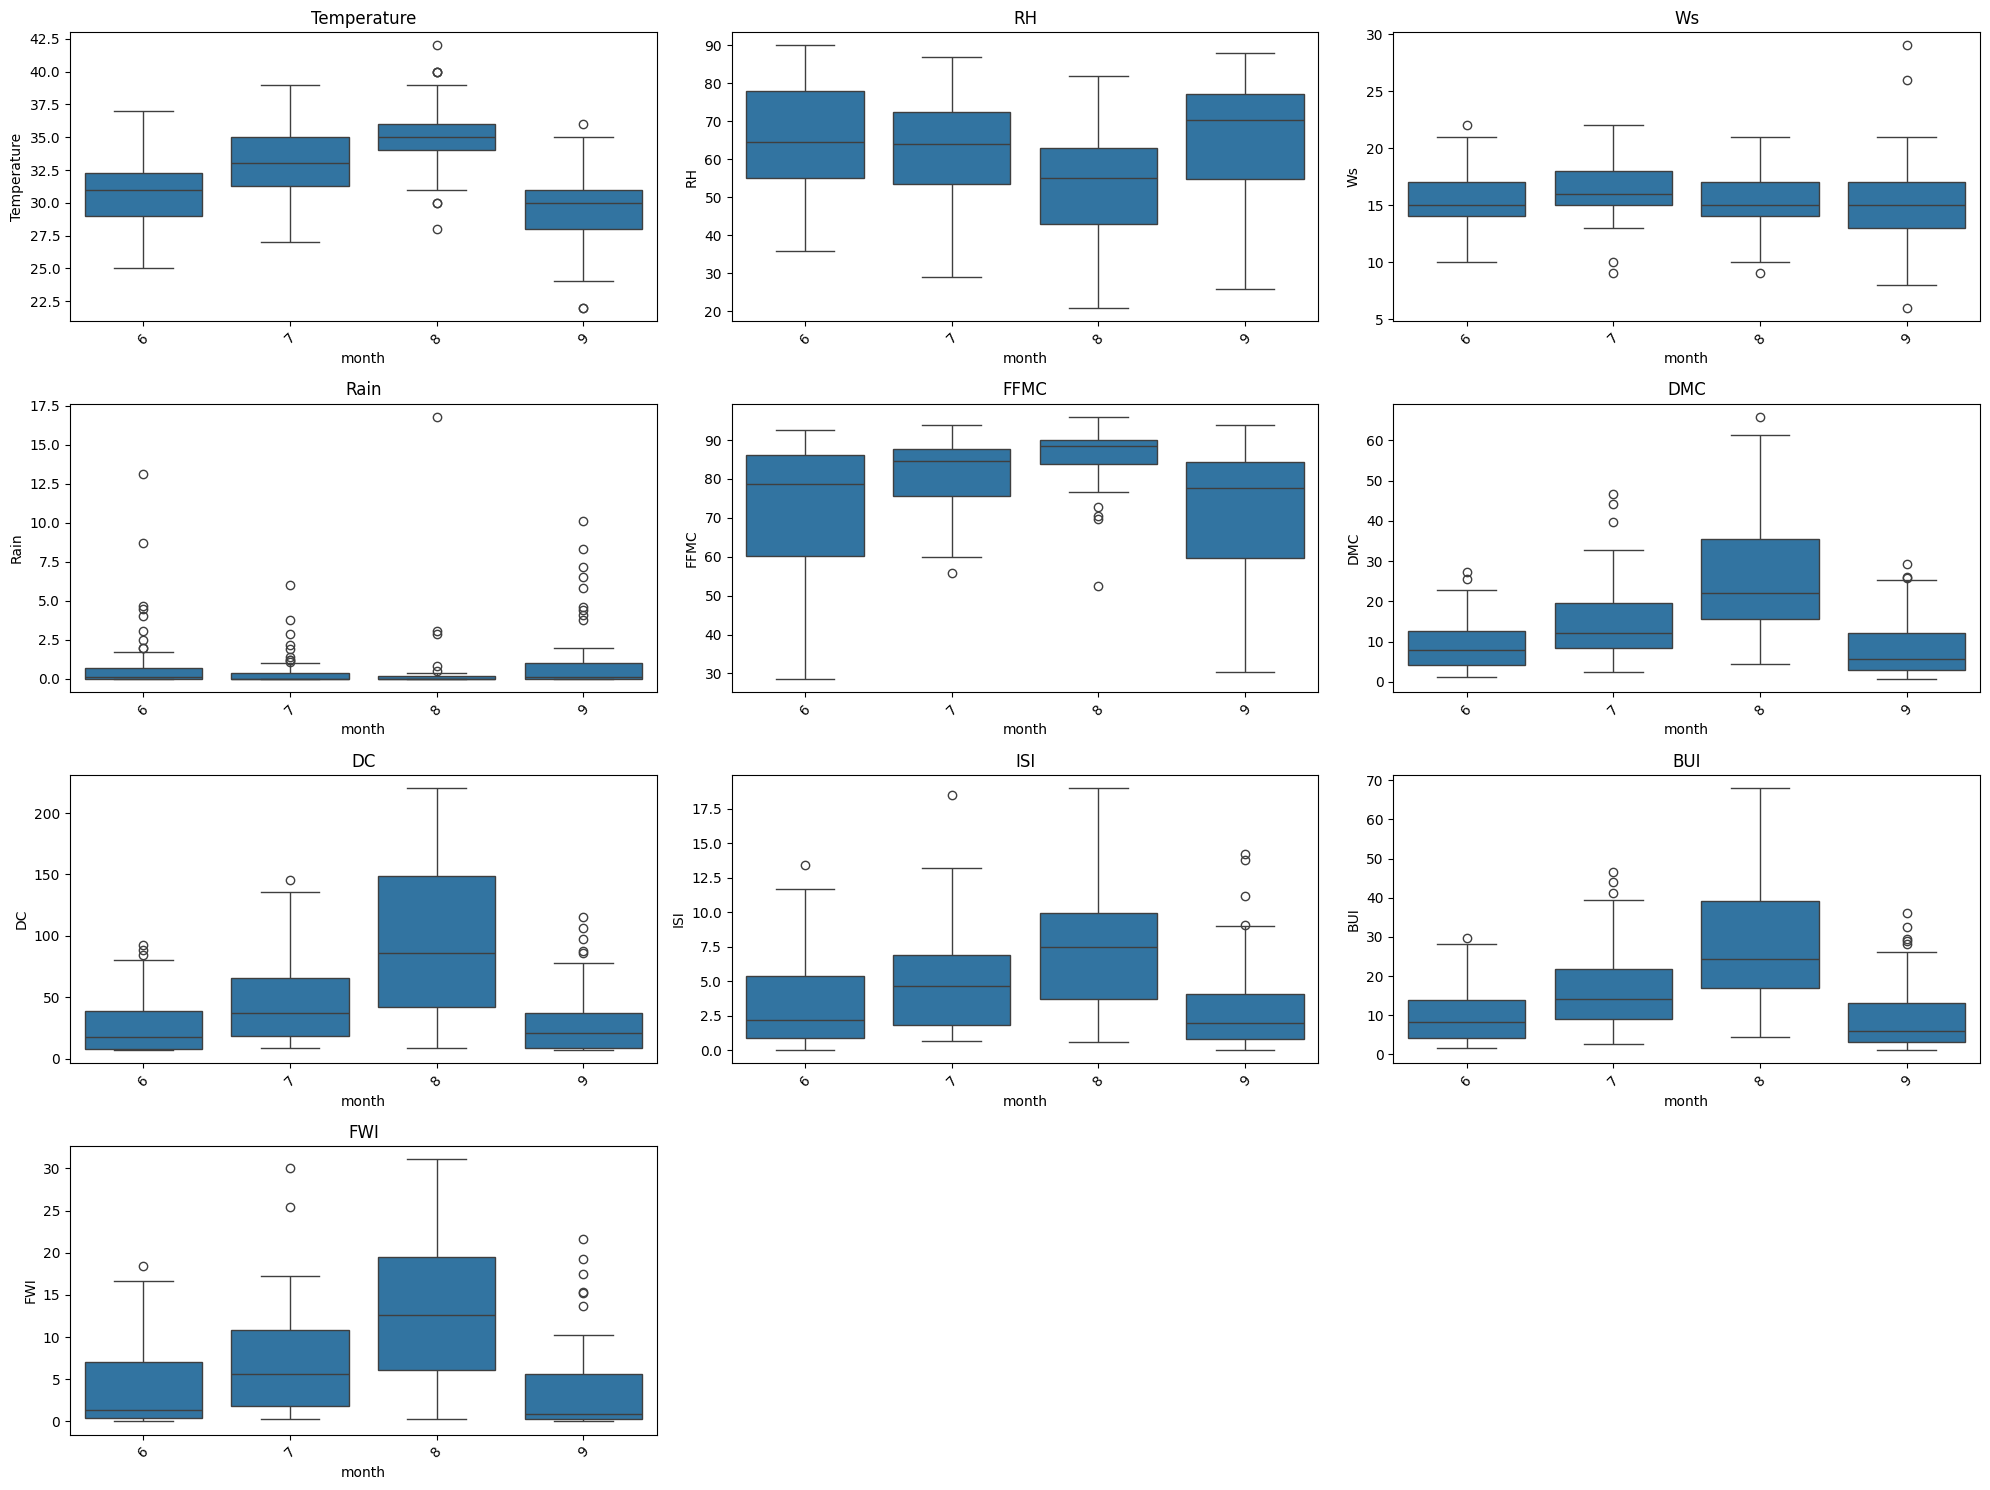

In [33]:
# Box plots by month for all features in a single figure
plt.figure(figsize=(20, 15))

# Calculate grid dimensions
n_features = len(numerical_features)
n_cols = 3  # You can adjust this
n_rows = (n_features + n_cols - 1) // n_cols

# Create subplots
for i, feature in enumerate(numerical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='month', y=feature, data=X)
    plt.title(feature)
    plt.xticks(rotation=45)  # Rotate month labels if needed

plt.tight_layout()
plt.show()

In [34]:
# Identify outliers using IQR
for feature in numerical_features:
    Q1 = X[feature].quantile(0.25)
    Q3 = X[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X[(X[feature] < lower_bound) | (X[feature] > upper_bound)]
    print(f"Feature: {feature}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {len(outliers) / len(X) * 100:.2f}%")
    print("-" * 50)

Feature: Temperature
Number of outliers: 2
Percentage of outliers: 0.82%
--------------------------------------------------
Feature: RH
Number of outliers: 0
Percentage of outliers: 0.00%
--------------------------------------------------
Feature: Ws
Number of outliers: 8
Percentage of outliers: 3.28%
--------------------------------------------------
Feature: Rain
Number of outliers: 35
Percentage of outliers: 14.34%
--------------------------------------------------
Feature: FFMC
Number of outliers: 16
Percentage of outliers: 6.56%
--------------------------------------------------
Feature: DMC
Number of outliers: 12
Percentage of outliers: 4.92%
--------------------------------------------------
Feature: DC
Number of outliers: 15
Percentage of outliers: 6.15%
--------------------------------------------------
Feature: ISI
Number of outliers: 4
Percentage of outliers: 1.64%
--------------------------------------------------
Feature: BUI
Number of outliers: 12
Percentage of outliers: 

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       244 non-null    object 
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
dtypes: float64(7), int64(5), object(1)
memory usage: 24.9+ KB


In [36]:
y

,Classes
0,not fire
1,not fire
2,not fire
3,not fire
4,not fire
...,...
239,fire
240,not fire
241,not fire
242,not fire


In [37]:
print(type(y))  # Check the type of y
print(y.head())  # Display the first few rows of y

<class 'pandas.core.frame.DataFrame'>
       Classes
0  not fire   
1  not fire   
2  not fire   
3  not fire   
4  not fire   


In [38]:
y = y['Classes']  # Extract the 'Classes' column

In [39]:
# Remove extra spaces from the 'Classes' column
y = y.str.strip()

In [40]:
# Verify the unique values in the 'Classes' column
print(y.unique())

['not fire' 'fire']


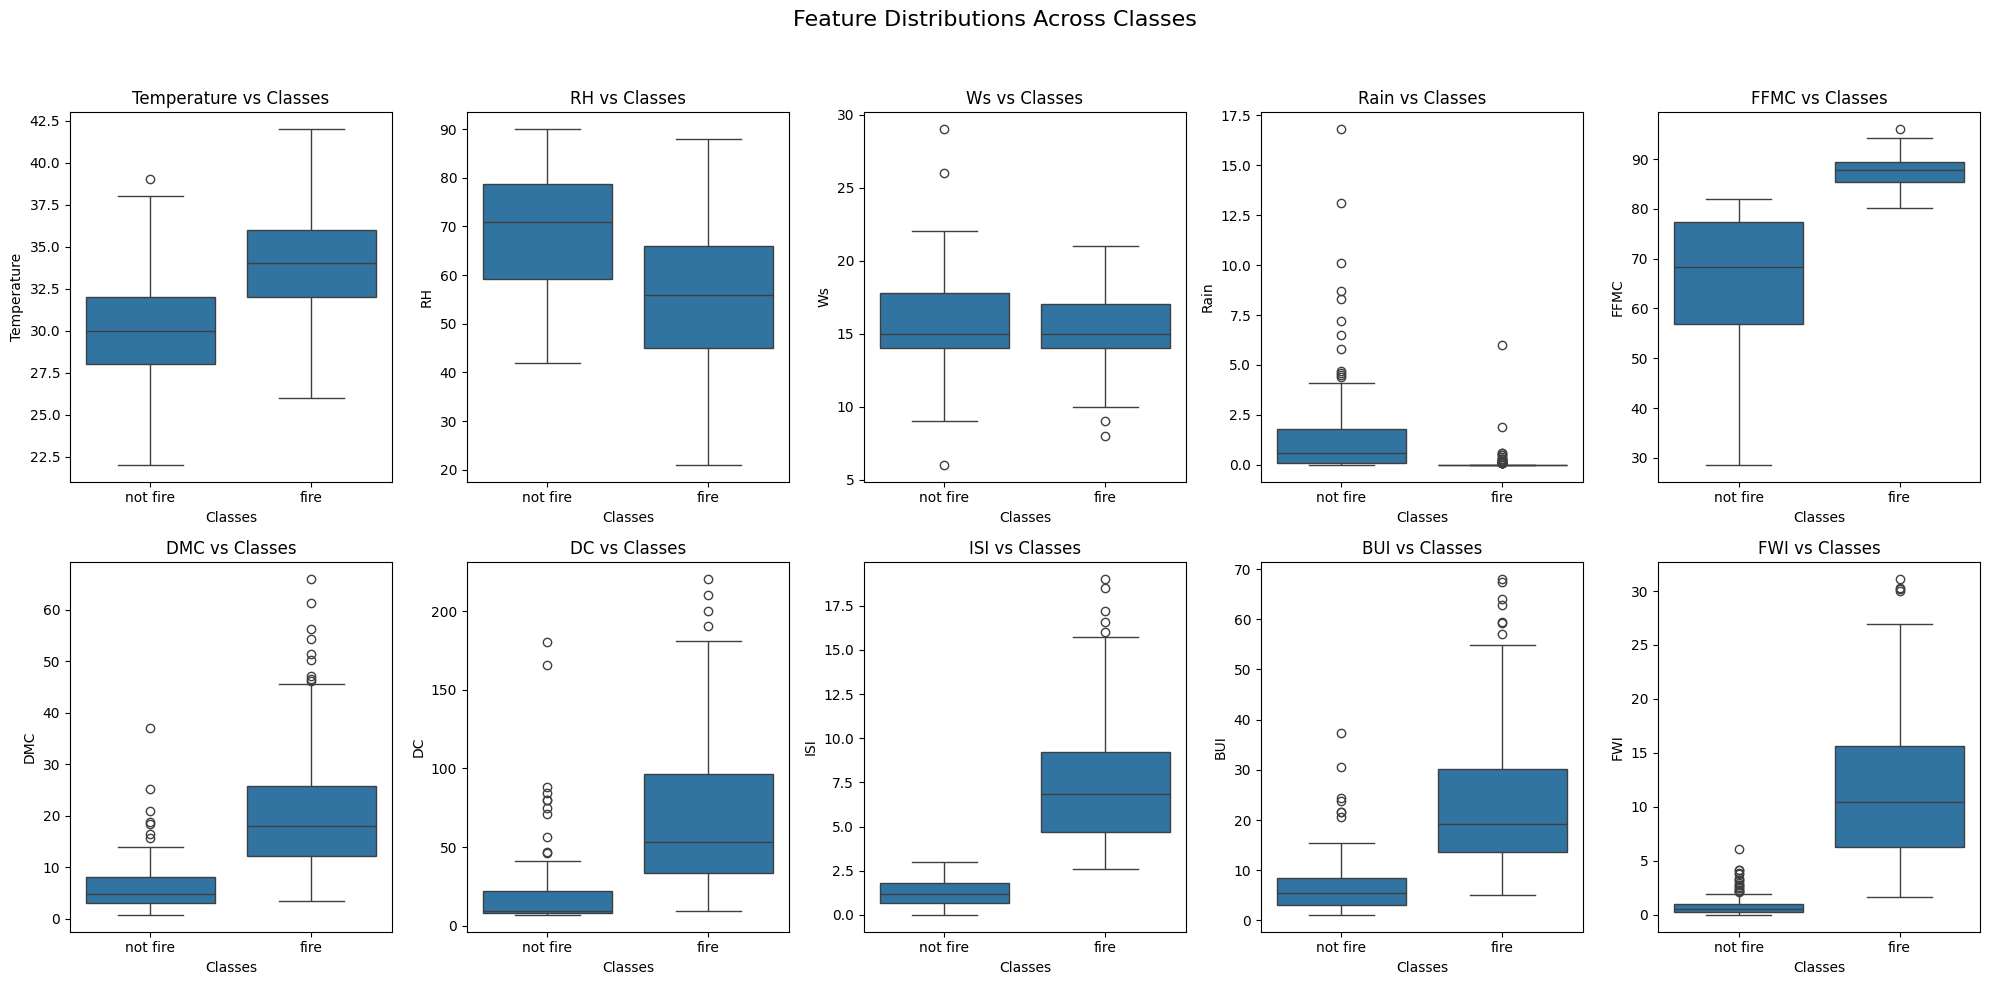

In [41]:
# Assuming `df` is your DataFrame and `Classes` is the target variable
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Set up the grid layout
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle('Feature Distributions Across Classes', fontsize=16)

# Loop through features and plot each box plot
for i, feature in enumerate(features):
    row, col = divmod(i, 5)  # Determine row and column index
    sns.boxplot(x=y, y=feature, data=X, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Classes')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
plt.show()

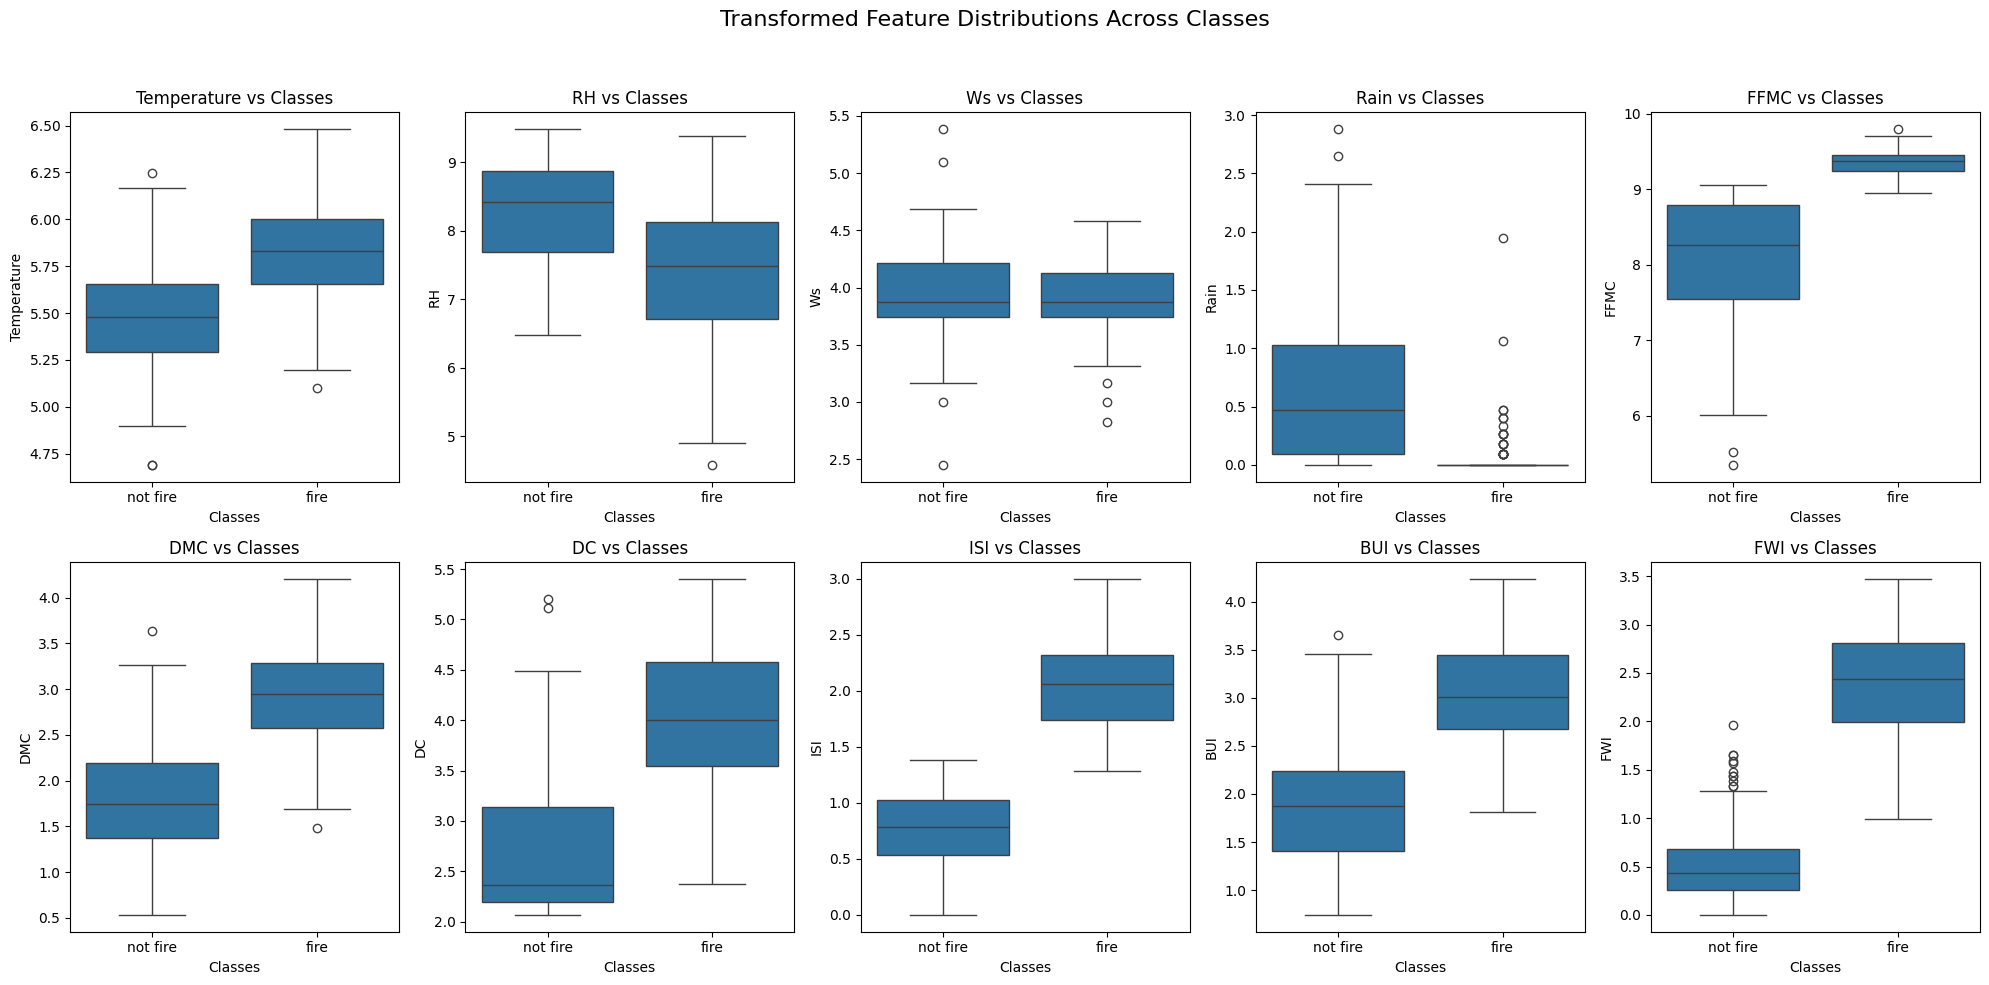

In [42]:
# List of features to transform
skewed_features = ['Rain', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Apply log transformation to skewed features
for feature in skewed_features:
    X[feature] = np.log1p(X[feature])  # log1p handles log(0) by adding 1

# Apply square root transformation to less skewed features (optional)
less_skewed_features = ['Temperature', 'RH', 'Ws', 'FFMC']
for feature in less_skewed_features:
    X[feature] = np.sqrt(X[feature])

# Re-plot box plots to check the effect of transformations
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
fig.suptitle('Transformed Feature Distributions Across Classes', fontsize=16)

features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
for i, feature in enumerate(features):
    row, col = divmod(i, 5)
    sns.boxplot(x=y, y=feature, data=X, ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs Classes')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [43]:
# Drop region column
X = X.drop(columns=['region'])

In [44]:
from sklearn.preprocessing import StandardScaler

# Select features for scaling
features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Standardize features
scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [46]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [47]:
y = y.apply(lambda x: 1 if x == 'fire' else 0)  # Encode target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the unique classes in y_train
unique_classes_train = y_train.unique()
print(f"Unique classes in y_train: {unique_classes_train}")

# Check the unique classes in y
unique_classes = y.unique()
print(f"Unique classes in y: {unique_classes}")

# Check if y has more than one class. If not, print a message and exit
if len(unique_classes) <= 1:
    print("Error: The target variable 'y' has only one class. SMOTE cannot be applied.")
    # You might want to handle this situation, for example, by collecting more data
    # or using a different technique that doesn't require multiple classes.
    # For now, we'll just exit to prevent further errors.
    exit()  # Or raise an exception

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now split the resampled data:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

# Train Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Unique classes in y_train: [0 1]
Unique classes in y: [0 1]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.98      0.98      0.98        41

    accuracy                           0.98        83
   macro avg       0.98      0.98      0.98        83
weighted avg       0.98      0.98      0.98        83



In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [49]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("-" * 50)

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.91      0.98      0.94        41

    accuracy                           0.94        83
   macro avg       0.94      0.94      0.94        83
weighted avg       0.94      0.94      0.94        83

Accuracy: 0.9397590361445783
--------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.95      0.98      0.96        41

    accuracy                           0.96        83
   macro avg       0.96      0.96      0.96        83
weighted avg       0.96      0.96      0.96        83

Accuracy: 0.963855421686747
--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
         

In [50]:
# Perform cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")
    print("-" * 50)

Model: Logistic Regression
Cross-Validation Accuracy: 0.9509 ± 0.0331
--------------------------------------------------
Model: Decision Tree
Cross-Validation Accuracy: 0.9754 ± 0.0238
--------------------------------------------------
Model: Random Forest
Cross-Validation Accuracy: 0.9755 ± 0.0300
--------------------------------------------------
Model: SVM
Cross-Validation Accuracy: 0.8851 ± 0.0444
--------------------------------------------------
Model: K-Nearest Neighbors
Cross-Validation Accuracy: 0.8688 ± 0.0168
--------------------------------------------------
Model: Naive Bayes
Cross-Validation Accuracy: 0.9219 ± 0.0463
--------------------------------------------------


In [51]:
from sklearn.feature_selection import RFE

# Assuming 'clf' is your RandomForestClassifier
rfe = RFE(estimator=clf, n_features_to_select=5)  # Select top 5 features
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X.columns[rfe.support_]
print(f"Selected features: {selected_features}")

# Train model using selected features
clf.fit(X_train[selected_features], y_train)

# Evaluate the model
y_pred = clf.predict(X_test[selected_features])
print(classification_report(y_test, y_pred))


Selected features: Index(['FFMC', 'DMC', 'DC', 'ISI', 'FWI'], dtype='object')
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.98      0.98      0.98        41

    accuracy                           0.98        83
   macro avg       0.98      0.98      0.98        83
weighted avg       0.98      0.98      0.98        83



In [52]:
# Get feature importances from the trained Random Forest
importances = clf.feature_importances_

# Assuming you used 'top_features' or 'selected_features' for training
# Replace feature_names with the appropriate list
feature_names = selected_features   # or selected_features

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features based on importance
top_features = feature_importance_df['Feature'][:5].tolist()  # Select top 5 features

# Train model using top features
clf.fit(X_train[top_features], y_train)

# Evaluate the model
y_pred = clf.predict(X_test[top_features])
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.95      0.98      0.96        41

    accuracy                           0.96        83
   macro avg       0.96      0.96      0.96        83
weighted avg       0.96      0.96      0.96        83



In [53]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Evaluate the model with best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9948717948717949
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.98      0.98      0.98        41

    accuracy                           0.98        83
   macro avg       0.98      0.98      0.98        83
weighted avg       0.98      0.98      0.98        83



In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20)
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=10, cv=5)

# Fit to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Evaluate the model with best parameters
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best parameters: {'max_depth': 20, 'min_samples_split': 19, 'n_estimators': 157}
Best score: 0.9948717948717949
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.98      0.98      0.98        41

    accuracy                           0.98        83
   macro avg       0.98      0.98      0.98        83
weighted avg       0.98      0.98      0.98        83



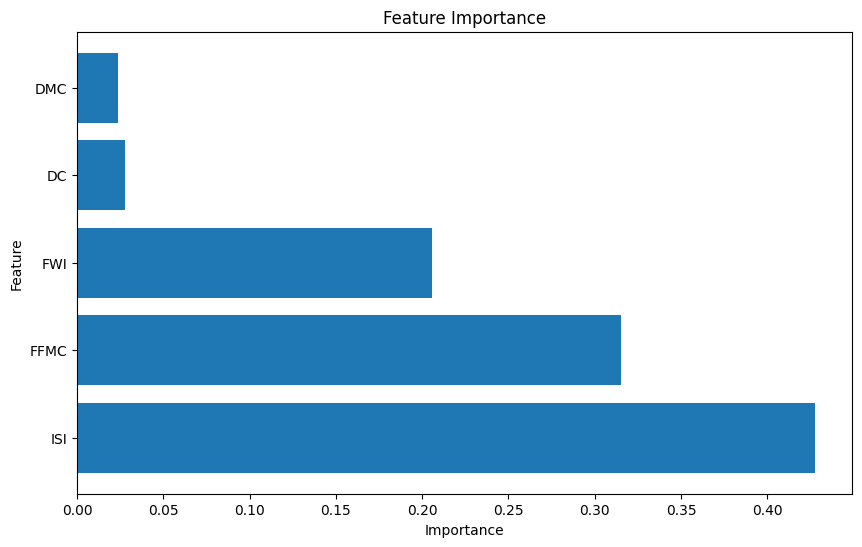

In [55]:
import matplotlib.pyplot as plt

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

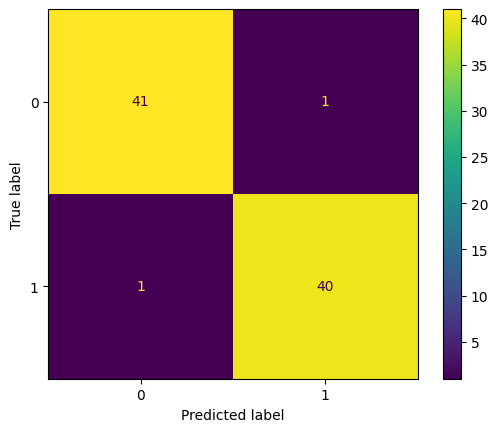

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

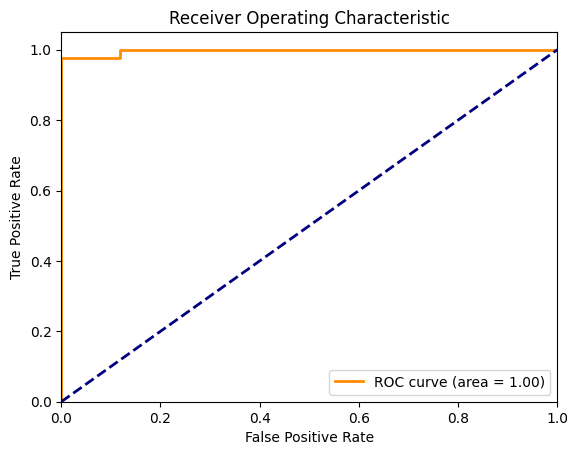

In [57]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = clf.predict_proba(X_test[top_features])[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models and hyperparameter grids (for tuning)
models = {
    "Linear Regression": (LinearRegression(), {}),
    "Ridge Regression": (Ridge(), {'alpha': [0.1, 1, 10]}),
    "Lasso Regression": (Lasso(), {'alpha': [0.1, 1, 10]}),
    "SVR": (SVR(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    "Decision Tree Regressor": (DecisionTreeRegressor(), {'max_depth': [None, 5, 10]}),
    "Random Forest Regressor": (RandomForestRegressor(), {'n_estimators': [100, 200], 'max_depth': [None, 10]})
}

# Train, evaluate, and tune each model
results = []
for name, (model, param_grid) in models.items():
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([name, mse, r2])

# Display results
results_df = pd.DataFrame(results, columns=['Model', 'MSE', 'R-squared'])
print(results_df)

# Identify the best model based on R-squared
best_model = results_df.loc[results_df['R-squared'].idxmax()]
print(f"\nBest Model: {best_model['Model']} (R-squared: {best_model['R-squared']:.4f})")

                     Model       MSE  R-squared
0        Linear Regression  0.038886   0.832197
1         Ridge Regression  0.039481   0.829633
2         Lasso Regression  0.070232   0.696932
3                      SVR  0.044890   0.806290
4  Decision Tree Regressor  0.027027   0.883373
5  Random Forest Regressor  0.012747   0.944993

Best Model: Random Forest Regressor (R-squared: 0.9450)


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models and hyperparameter grids
models = {
    "Logistic Regression": (LogisticRegression(), {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear']}),
    "SVM": (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    "Decision Tree": (DecisionTreeClassifier(), {'max_depth': [None, 5, 10]}),
    "Naive Bayes": (GaussianNB(), {}),
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [None, 10]})
}

# Train, evaluate, and tune each model
best_model = None
best_score = 0

for name, (model, param_grid) in models.items():
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))

    # Update best model if current model has higher accuracy
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_

print(f"\nBest Model: {best_model.__class__.__name__} (Accuracy: {best_score:.4f})")

Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        47

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74

Model: SVM
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.96      0.94      0.95        47

    accuracy                           0.93        74
   macro avg       0.92      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       0.98      0.96      0.97        47

    accuracy                           0.96        74
   macro avg       0.95      0.96      0.96        74
weighted avg   

In [63]:
from sklearn.ensemble import RandomForestClassifier
regressor=RandomForestClassifier()
regressor.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
import pickle
pickle.dump(regressor, open('model.pkl', 'wb'))

In [65]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1])